In [65]:
#weather predcition Using LSTM Deplearning Model Assignment 

In [4]:

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [66]:
#imporing Data using Data frame 
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_534172691ebf43cdac65ae793bf14b35 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YFH5bm2xuIeo_jbLu1v5Q-QW_doo-c-lQvr6RwMg9CYJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_534172691ebf43cdac65ae793bf14b35.get_object(Bucket='weatherpredictionlstm-donotdelete-pr-4dtpwildkxbte4',Key='testset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [7]:
data


,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0
19961101-16:00,23.0
...,...
20170424-06:00,34.0
20170424-09:00,38.0
20170424-12:00,36.0


In [8]:
data.corr()

,temp
temp,1.0


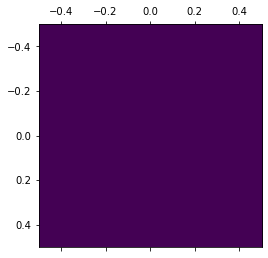

In [9]:
plt.matshow(data.corr())
plt.show()

In [10]:
df=data[:365]

In [11]:
df.shape

(365, 1)

In [12]:
df.isnull().sum()

temp    3
dtype: int64

In [13]:
df=df.dropna(axis=0)

In [14]:
df.shape

(362, 1)

In [15]:
df=df['temp'].values

In [16]:
df[:5]

array([30., 28., 24., 24., 23.])

In [17]:
df=df.reshape(-1,1)

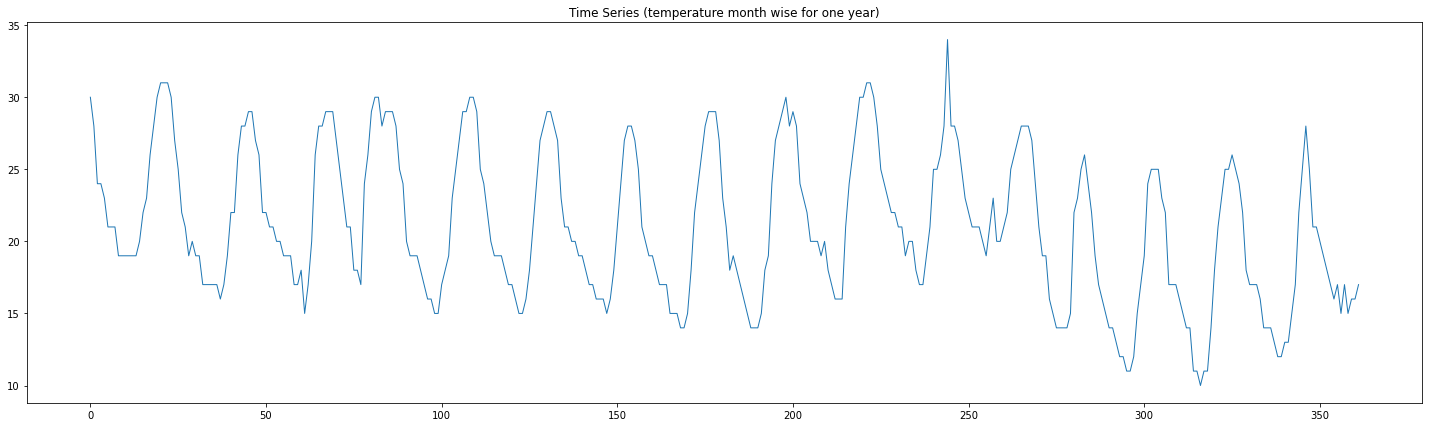

In [18]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for one year)")
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [20]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

In [21]:
data_scaled.shape

(362, 1)

In [22]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [23]:
out[:20]

[array([0.875]),
 array([0.875]),
 array([0.875]),
 array([0.83333333]),
 array([0.70833333]),
 array([0.625]),
 array([0.5]),
 array([0.45833333]),
 array([0.375]),
 array([0.41666667]),
 array([0.375]),
 array([0.375]),
 array([0.29166667]),
 array([0.29166667]),
 array([0.29166667]),
 array([0.29166667]),
 array([0.29166667]),
 array([0.25]),
 array([0.29166667]),
 array([0.375])]

In [24]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [25]:
len(df)*0.65

235.3

In [26]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]



In [27]:
inp.shape

(342, 20, 1)

In [28]:
x_train.shape

(237, 20, 1)

In [29]:
x_test.shape


(105, 20, 1)

In [30]:
!pip install Keras

In [31]:
!pip install --ignore-installed --upgrade tensorflow

     |████████████████████████████████| 497.6 MB 16 kB/s s eta 0:00:01MB 14.1 MB/s eta 0:00:35                       | 35.2 MB 14.1 MB/s eta 0:00:33��█████████████▍    | 426.5 MB 44.2 MB/s eta 0:00:02
     |████████████████████████████████| 1.4 MB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 70.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 53.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 53.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 4

In [32]:
import tensorflow as tf 

2022-04-05 00:33:00.582004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

2022-04-05 00:33:02.538134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-04-05 00:33:02.538203: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [35]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 [==============================] - 6s 98ms/step - loss: 0.1238
Epoch 2/300
8/8 [==============================] - 0s 60ms/step - loss: 0.0695
Epoch 3/300
8/8 [==============================] - 0s 57ms/step - loss: 0.0611
Epoch 4/300
8/8 [==============================] - 0s 56ms/step - loss: 0.0530
Epoch 5/300
8/8 [==============================] - 0s 53ms/step - loss: 0.0523
Epoch 6/300
8/8 [==============================] - 0s 52ms/step - loss: 0.0502
Epoch 7/300
8/8 [==============================] - 0s 54ms/step - loss: 0.0472
Epoch 8/300
8/8 [==============================] - 0s 51ms/step - loss: 0.0459
Epoch 9/300
8/8 [==============================] - 0s 51ms/step - loss: 0.0439
Epoch 10/300
8/8 [==============================] - 0s 54ms/step - loss: 0.0419
Epoch 11/300
8/8 [==============================] - 0s 51ms/step - loss: 0.0390
Epoch 12/300
8/8 [==============================] - 0s 58ms/step - loss: 0.0359
Epoch 13/300
8/8 [==============================]

In [36]:
# model.evaluate(x_test, y_test)

In [37]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])


Predicted Value 0.71139616
Expected value 0.7083333333333334


In [38]:
predictions=model.predict(x_test)

In [39]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.3856371
Expected Value 0.41666666666666663


In [40]:
predictions.shape


(105, 1)

In [41]:
y_test.shape

(105, 1)

In [42]:
pred_df=pd.DataFrame(predictions)

In [43]:
pred_df['TrueValues']=y_test

In [44]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [45]:
pred_df_new

,Predictions,TrueValues
0,0.426426,0.541667
1,0.538898,0.416667
2,0.385637,0.416667
3,0.386377,0.458333
4,0.468255,0.500000
...,...,...
100,0.196688,0.291667
101,0.236979,0.208333
102,0.206417,0.250000
103,0.250739,0.250000


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

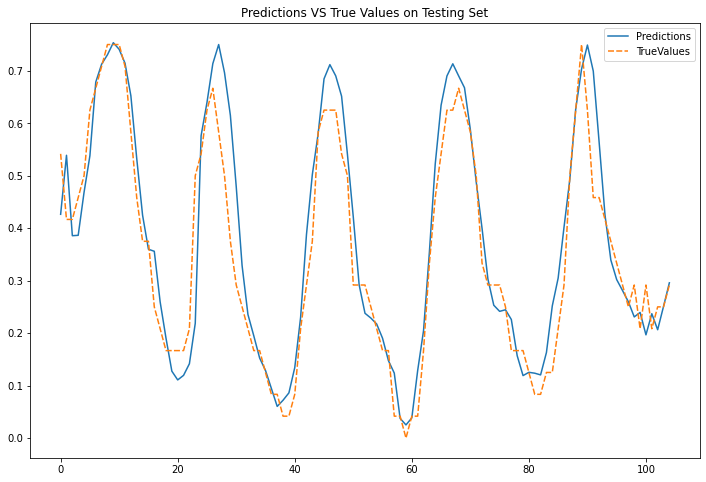

In [46]:

plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

In [47]:
# Weather Predictions for next 30 Days

In [48]:
data_scaled.shape

(362, 1)

In [49]:
x_input=data_scaled[:20]

In [50]:
x_input.shape

(20, 1)

In [51]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [52]:
x_input.shape

(1, 20)

In [53]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [54]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [60]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.36898214 0.34240159 0.30866012 0.26610491 0.21792899 0.17341268
 0.14416793 0.14259471 0.17898107 0.25775072 0.37184989 0.50163358
 0.62076646 0.7102769  0.76315844 0.78131676 0.77379912 0.7489571
 0.66590464 0.5552271 ]
0 day output [[0.46588743]]
1 day input [0.34240159 0.30866012 0.26610491 0.21792899 0.17341268 0.14416793
 0.14259471 0.17898107 0.25775072 0.37184989 0.50163358 0.62076646
 0.7102769  0.76315844 0.78131676 0.77379912 0.7489571  0.66590464
 0.5552271  0.46588743]
1 day output [[0.40707022]]
2 day input [0.30866012 0.26610491 0.21792899 0.17341268 0.14416793 0.14259471
 0.17898107 0.25775072 0.37184989 0.50163358 0.62076646 0.7102769
 0.76315844 0.78131676 0.77379912 0.7489571  0.66590464 0.5552271
 0.46588743 0.40707022]
2 day output [[0.3728321]]
3 day input [0.26610491 0.21792899 0.17341268 0.14416793 0.14259471 0.17898107
 0.25775072 0.37184989 0.50163358 0.62076646 0.7102769  0.76315844
 0.78131676 0.77379912 0.7489571  0.66590464 0.5552271  0.46588

In [61]:
day_new = np.arange(1,363)
day_pred = np.arange(363,393)

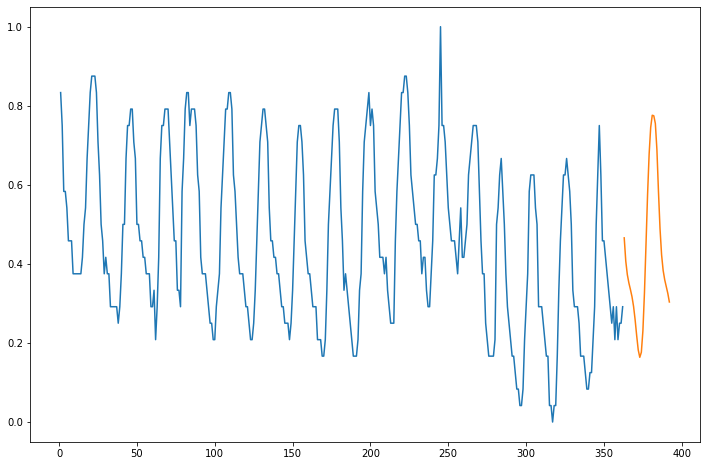

In [62]:
plt.figure(figsize=(12,8))
plt.plot(day_new,data_scaled)
plt.plot(day_pred,lst_output)

In [63]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

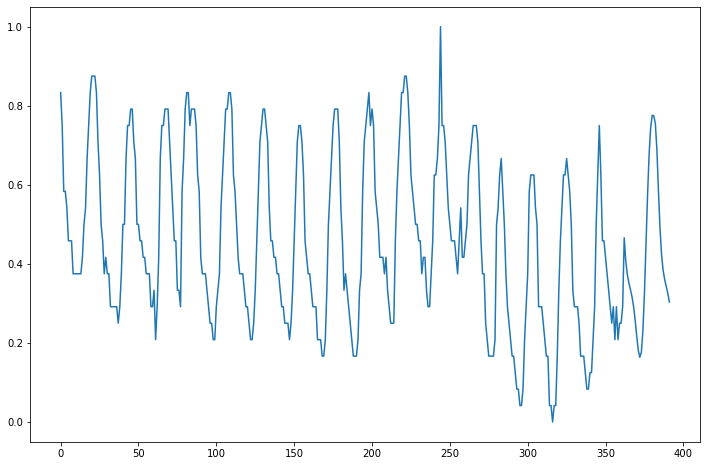

In [64]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)